<a href="https://colab.research.google.com/github/LaurelleJinelle/Formative-2---Data-Preprocessing_-Group-3/blob/main/models/Voiceprint_Verification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sound Data Collection and Processing

In [1]:
!ffmpeg -version

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import soundfile as sf
from pydub import AudioSegment
import os
import glob

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [4]:
audio_path = '/content/drive/MyDrive/ML Pipeline Group 3/Audio for Formative 3 Group 3/'

In [5]:
!apt install ffmpeg -y
!pip install pydub

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [6]:
# Convert all non-WAV files to WAV ---

audio_files = glob.glob(audio_path + "*.*")
for file in audio_files:
    if not file.lower().endswith(".wav"):
        output_path = os.path.splitext(file)[0] + ".wav"
        try:
            sound = AudioSegment.from_file(file)
            sound.export(output_path, format="wav")
            print(f"Converted: {os.path.basename(file)} → {os.path.basename(output_path)}")
        except Exception as e:
            print(f"Skipped {os.path.basename(file)} due to error: {e}")
    else:
        print(f"Already WAV: {os.path.basename(file)}")


Converted: Wilsons-Confirm.aac → Wilsons-Confirm.wav
Converted: Wilsons-approve.aac → Wilsons-approve.wav
Converted: LJ_Approve.opus → LJ_Approve.wav
Converted: LJ_confirm.opus → LJ_confirm.wav
Converted: Emmanuel_approve.m4a → Emmanuel_approve.wav
Converted: Emmanuel_confirm.m4a → Emmanuel_confirm.wav
Converted: Leny_approve.opus → Leny_approve.wav
Converted: Leny_confirm.opus → Leny_confirm.wav


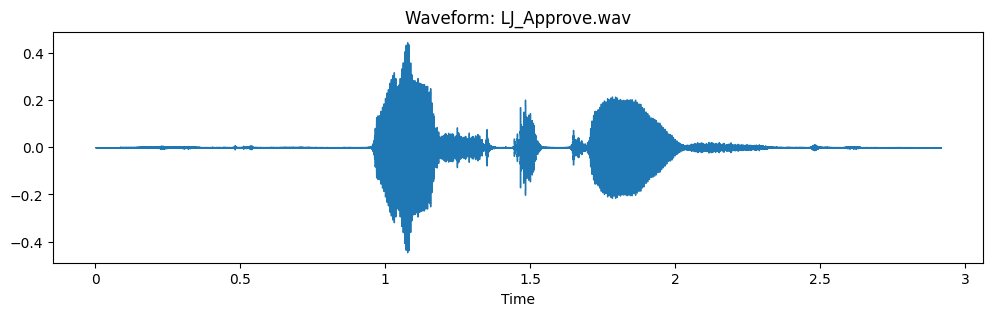

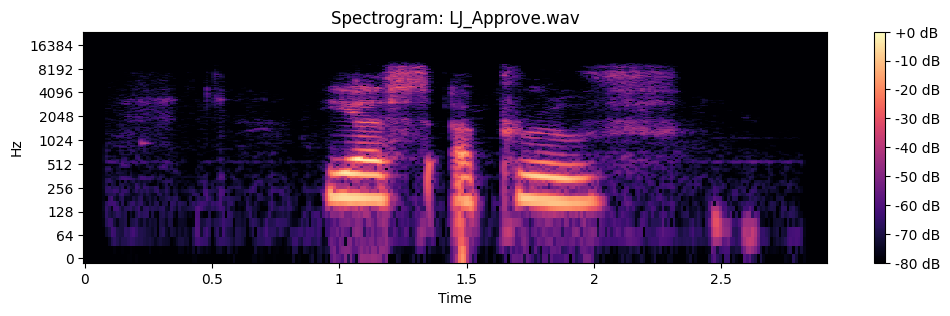

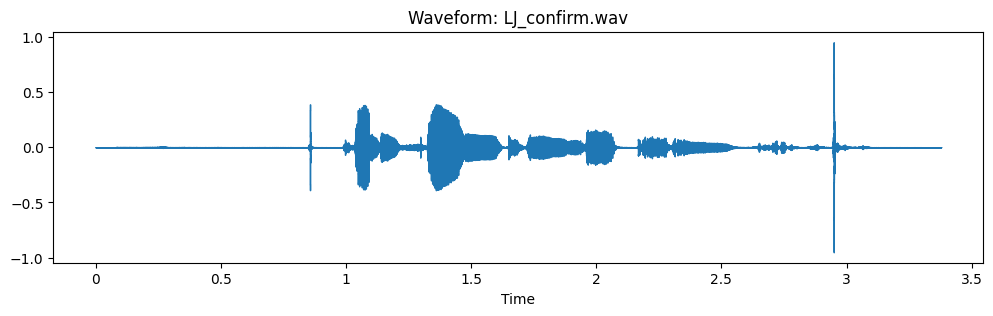

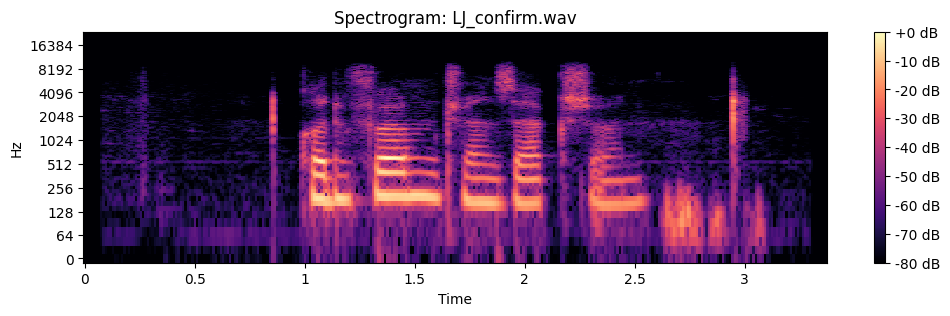

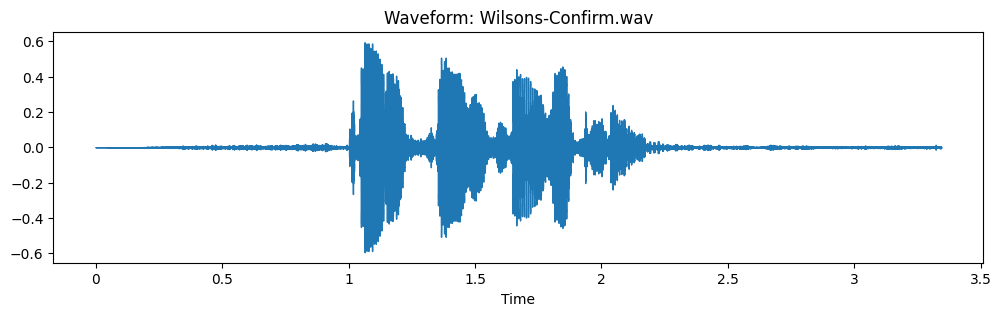

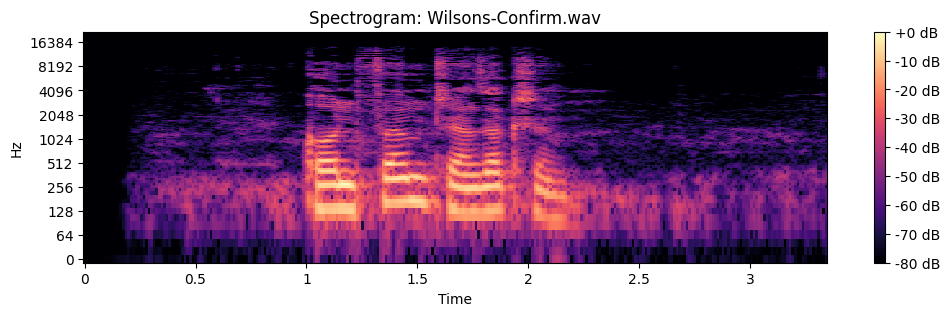

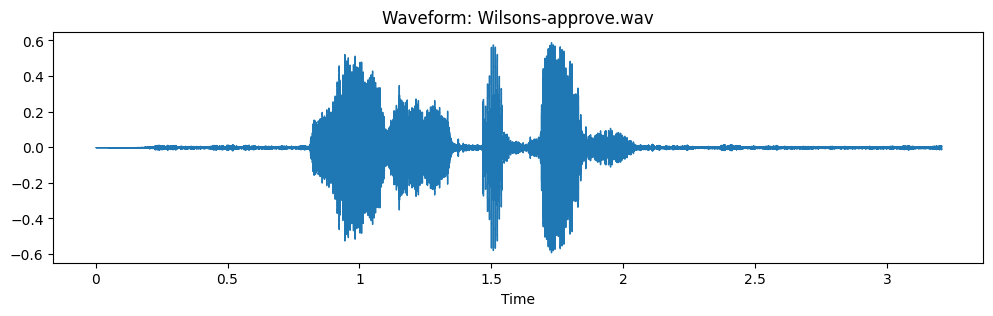

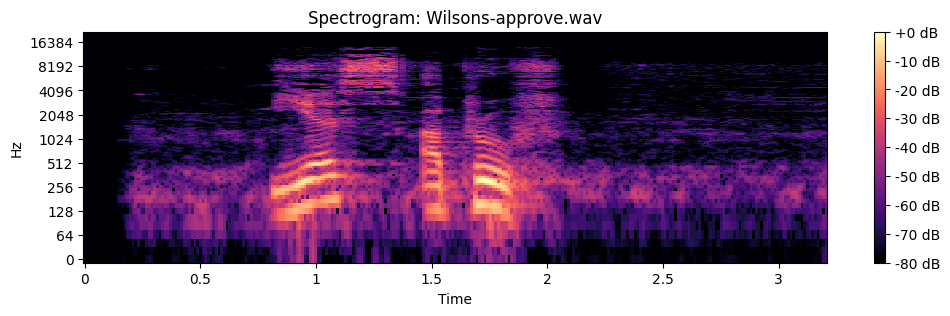

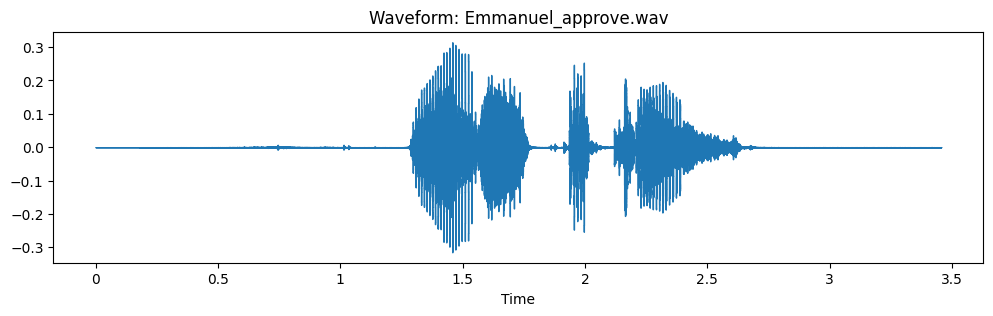

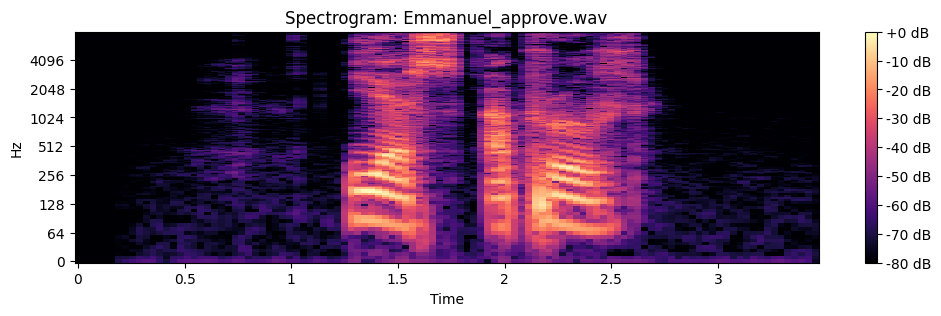

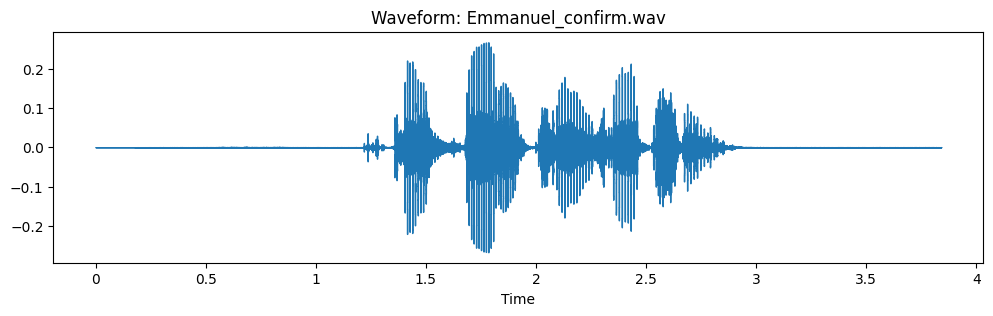

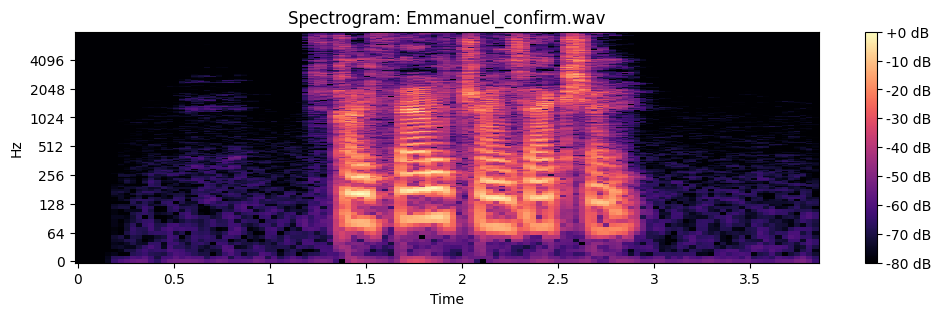

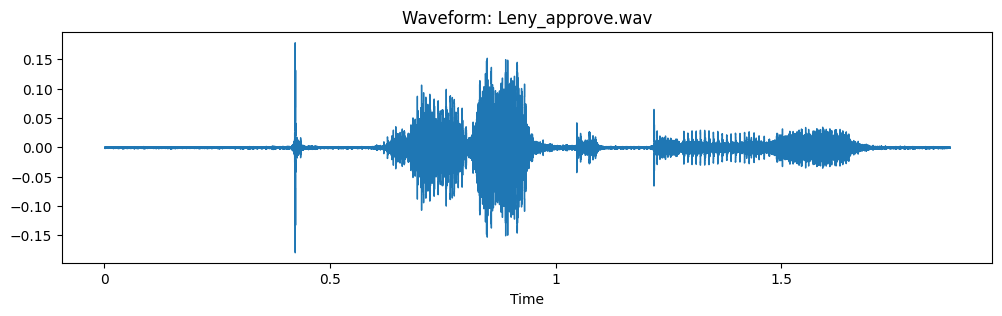

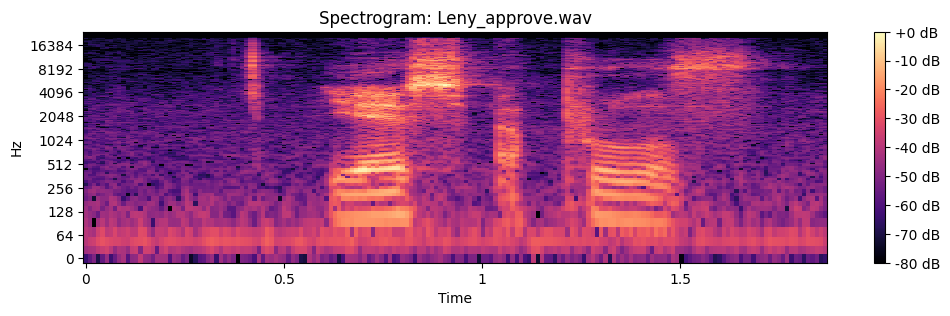

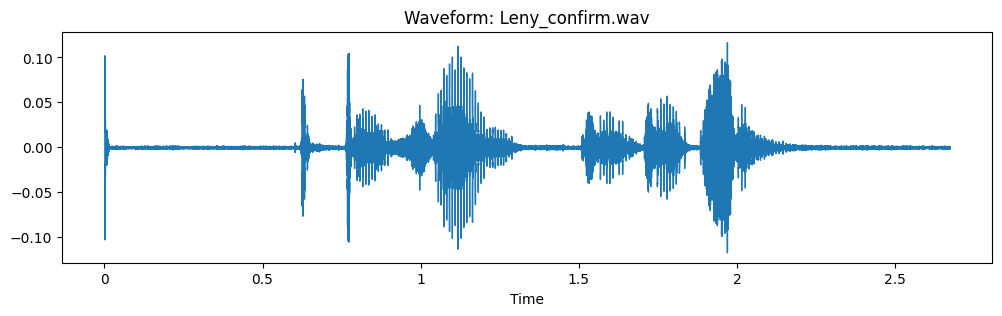

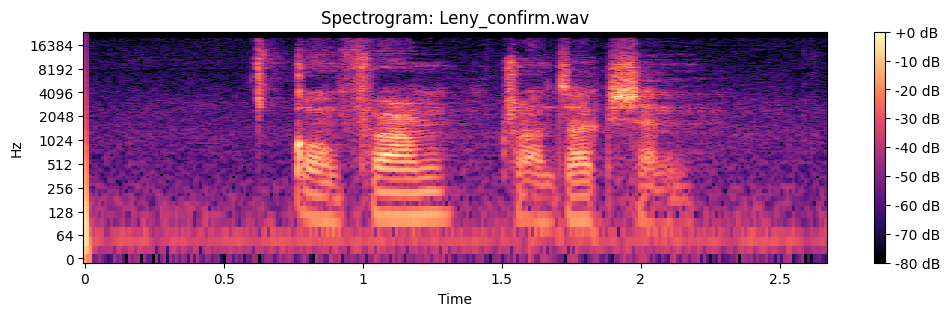

In [7]:
def display_audio(filepath):
    y, sr = librosa.load(filepath, sr=None)
    plt.figure(figsize=(12, 3))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: {os.path.basename(filepath)}")
    plt.show()

    plt.figure(figsize=(12, 3))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f"Spectrogram: {os.path.basename(filepath)}")
    plt.colorbar(format='%+2.0f dB')
    plt.show()

display_audio(audio_path + 'LJ_Approve.wav')
display_audio(audio_path + 'LJ_confirm.wav')
display_audio(audio_path + 'Wilsons-Confirm.wav')
display_audio(audio_path + 'Wilsons-approve.wav')
display_audio(audio_path + 'Emmanuel_approve.wav')
display_audio(audio_path + 'Emmanuel_confirm.wav')
display_audio(audio_path + 'Leny_approve.wav')
display_audio(audio_path + 'Leny_confirm.wav')

In [8]:
def augment_audio(y, sr, out_prefix, save_dir):
    y_trimmed, _ = librosa.effects.trim(y, top_db=20)
    sf.write(f"{save_dir}/{out_prefix}_trimmed.wav", y_trimmed, sr)

    y_pitch = librosa.effects.pitch_shift(y_trimmed, sr=sr, n_steps=2)
    sf.write(f"{save_dir}/{out_prefix}_pitch.wav", y_pitch, sr)

    y_stretch = librosa.effects.time_stretch(y_trimmed, rate=1.2)
    sf.write(f"{save_dir}/{out_prefix}_stretch.wav", y_stretch, sr)

    noise = np.random.randn(len(y_trimmed))
    y_noise = y_trimmed + 0.005 * noise
    sf.write(f"{save_dir}/{out_prefix}_noise.wav", y_noise, sr)

    print(f"Augmentations + trimming saved for {out_prefix}")

audio_files = ['LJ_Approve.wav',
                'LJ_confirm.wav',
                'Wilsons-Confirm.wav',
                'Wilsons-approve.wav',
                'Emmanuel_approve.wav',
                'Emmanuel_confirm.wav',
                'Leny_approve.wav',
                'Leny_confirm.wav'
                ]

for file in audio_files:
    filepath = audio_path + file
    y, sr = librosa.load(filepath, sr=None)
    augment_audio(y, sr, os.path.splitext(file)[0], audio_path)

Augmentations + trimming saved for LJ_Approve
Augmentations + trimming saved for LJ_confirm
Augmentations + trimming saved for Wilsons-Confirm
Augmentations + trimming saved for Wilsons-approve
Augmentations + trimming saved for Emmanuel_approve
Augmentations + trimming saved for Emmanuel_confirm
Augmentations + trimming saved for Leny_approve
Augmentations + trimming saved for Leny_confirm


In [9]:
audio_path = '/content/drive/MyDrive/ML Pipeline Group 3/Audio for Formative 3 Group 3/'

def extract_features(filepath):
    y, sr = librosa.load(filepath, sr=None)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    energy = np.mean(librosa.feature.rms(y=y))
    return list(mfccs) + [rolloff, energy]

audio_files = glob.glob(audio_path + "*.wav")

data = []
for f in audio_files:
    try:
        features = extract_features(f)
        data.append([os.path.basename(f)] + features)
        print(f"Extracted features from {os.path.basename(f)}")
    except Exception as e:
        print(f"Skipped {os.path.basename(f)} due to error: {e}")

columns = ["filename"] + [f"mfcc_{i+1}" for i in range(13)] + ["rolloff", "energy"]
df = pd.DataFrame(data, columns=columns)
df.to_csv(audio_path + "audio_features.csv", index=False)
print("\nFeatures saved to audio_features.csv")

Extracted features from Wilsons-Confirm.wav
Extracted features from Wilsons-approve.wav
Extracted features from LJ_Approve.wav
Extracted features from LJ_confirm.wav
Extracted features from Emmanuel_approve.wav
Extracted features from Emmanuel_confirm.wav
Extracted features from Leny_approve.wav
Extracted features from Leny_confirm.wav
Extracted features from LJ_Approve_trimmed.wav
Extracted features from LJ_Approve_pitch.wav
Extracted features from LJ_Approve_stretch.wav
Extracted features from LJ_Approve_noise.wav
Extracted features from LJ_confirm_trimmed.wav
Extracted features from LJ_confirm_pitch.wav
Extracted features from LJ_confirm_stretch.wav
Extracted features from LJ_confirm_noise.wav
Extracted features from Wilsons-Confirm_trimmed.wav
Extracted features from Wilsons-Confirm_pitch.wav
Extracted features from Wilsons-Confirm_stretch.wav
Extracted features from Wilsons-Confirm_noise.wav
Extracted features from Wilsons-approve_trimmed.wav
Extracted features from Wilsons-approv

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  40 non-null     object 
 1   mfcc_1    40 non-null     float32
 2   mfcc_2    40 non-null     float32
 3   mfcc_3    40 non-null     float32
 4   mfcc_4    40 non-null     float32
 5   mfcc_5    40 non-null     float32
 6   mfcc_6    40 non-null     float32
 7   mfcc_7    40 non-null     float32
 8   mfcc_8    40 non-null     float32
 9   mfcc_9    40 non-null     float32
 10  mfcc_10   40 non-null     float32
 11  mfcc_11   40 non-null     float32
 12  mfcc_12   40 non-null     float32
 13  mfcc_13   40 non-null     float32
 14  rolloff   40 non-null     float64
 15  energy    40 non-null     float32
dtypes: float32(14), float64(1), object(1)
memory usage: 2.9+ KB


#Voiceprint Verification Model

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  40 non-null     object 
 1   mfcc_1    40 non-null     float64
 2   mfcc_2    40 non-null     float64
 3   mfcc_3    40 non-null     float64
 4   mfcc_4    40 non-null     float64
 5   mfcc_5    40 non-null     float64
 6   mfcc_6    40 non-null     float64
 7   mfcc_7    40 non-null     float64
 8   mfcc_8    40 non-null     float64
 9   mfcc_9    40 non-null     float64
 10  mfcc_10   40 non-null     float64
 11  mfcc_11   40 non-null     float64
 12  mfcc_12   40 non-null     float64
 13  mfcc_13   40 non-null     float64
 14  rolloff   40 non-null     float64
 15  energy    40 non-null     float64
 16  speaker   40 non-null     object 
dtypes: float64(15), object(2)
memory usage: 5.4+ KB


In [24]:
audio_path = '/content/drive/MyDrive/ML Pipeline Group 3/Audio for Formative 3 Group 3/'
df = pd.read_csv(audio_path + 'audio_features.csv')
df.head()

,filename,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,rolloff,energy
0,Wilsons-Confirm.wav,-417.10675,106.574005,16.044813,20.981726,2.542845,14.251184,7.463095,11.219763,8.648409,-11.329096,-8.942734,-6.399984,-10.108210,3699.687432,0.037951
1,Wilsons-approve.wav,-397.87033,81.452095,13.306774,28.787440,-4.921340,18.189205,10.136951,0.197189,6.943589,-17.049690,-14.858170,-10.214537,-16.532251,5623.275503,0.040633
2,LJ_Approve.wav,-504.62836,71.637420,-1.836044,20.141846,5.389439,-2.680406,10.687080,1.685747,-1.555532,-8.002174,-11.053333,0.275210,1.059580,4330.120894,0.021203
3,LJ_confirm.wav,-480.94666,97.231610,1.708937,13.875328,11.491762,3.156618,10.098547,4.199728,0.142799,-7.542403,-8.624522,4.366077,5.424529,3358.290615,0.026639
4,Emmanuel_approve.wav,-488.88293,38.387173,12.737389,10.347635,4.347104,13.409805,4.252093,-10.431032,-3.493324,-5.115466,1.117961,-3.534475,-2.467003,4270.785550,0.018919


In [25]:
def extract_speaker_name(filename):
    if '-' in filename:
        return filename.split('-')[0]
    else:
        return filename.split('_')[0]

df['speaker'] = df['filename'].apply(extract_speaker_name)

In [26]:
df.head(5)

,filename,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,rolloff,energy,speaker
0,Wilsons-Confirm.wav,-417.10675,106.574005,16.044813,20.981726,2.542845,14.251184,7.463095,11.219763,8.648409,-11.329096,-8.942734,-6.399984,-10.108210,3699.687432,0.037951,Wilsons
1,Wilsons-approve.wav,-397.87033,81.452095,13.306774,28.787440,-4.921340,18.189205,10.136951,0.197189,6.943589,-17.049690,-14.858170,-10.214537,-16.532251,5623.275503,0.040633,Wilsons
2,LJ_Approve.wav,-504.62836,71.637420,-1.836044,20.141846,5.389439,-2.680406,10.687080,1.685747,-1.555532,-8.002174,-11.053333,0.275210,1.059580,4330.120894,0.021203,LJ
3,LJ_confirm.wav,-480.94666,97.231610,1.708937,13.875328,11.491762,3.156618,10.098547,4.199728,0.142799,-7.542403,-8.624522,4.366077,5.424529,3358.290615,0.026639,LJ
4,Emmanuel_approve.wav,-488.88293,38.387173,12.737389,10.347635,4.347104,13.409805,4.252093,-10.431032,-3.493324,-5.115466,1.117961,-3.534475,-2.467003,4270.785550,0.018919,Emmanuel


In [27]:
X = df.drop(columns=['filename', 'speaker'])
y = df['speaker']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [29]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
loss = log_loss(y_test, y_proba)

print(f"Accuracy: {acc:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Log Loss: {loss:.3f}")
print("\nDetailed Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.000
F1-Score: 1.000
Log Loss: 0.263

Detailed Report:
               precision    recall  f1-score   support

    Emmanuel       1.00      1.00      1.00         2
          LJ       1.00      1.00      1.00         2
        Leny       1.00      1.00      1.00         2
     Wilsons       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [30]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", acc_scores)
print("Mean CV Accuracy:", np.mean(acc_scores))


Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


In [31]:
results = pd.DataFrame({
    'Model': ['Random Forest (Voiceprint)'],
    'Accuracy': [1.00],
    'F1-Score': [1.00],
    'Log Loss': [0.263],
    'CV Mean Accuracy': [1.00]
})
results

,Model,Accuracy,F1-Score,Log Loss,CV Mean Accuracy
0,Random Forest (Voiceprint),1.0,1.0,0.263,1.0
